Loss Function & Optimization

In [133]:
import numpy as np
x_train = np.array([1.2, 2.0, 2.8, 3.6, 4.5, 5.1, 6.0, 6.7])
y_train = np.array([8.5, 11.1, 13.9, 16.2, 19.8, 21.4, 23.9, 26.1])

x_test = np.array([7.5, 8.2, 9.0, 9.8])
y_test = np.array([28.4, 30.1, 32.7, 34.6])

Mean Squared Error (MSE) — Standard Loss Function

In [134]:
def mse(y_t , y_p ):
  sum = 0
  for i in range(0,len(y_t)):
    sum += (y_t[i] - y_p[i])**2
  return sum / len(y_t)

In [135]:
slope = 3.219369003866164
constant = 4.77526609708367

y_pred = x_train*slope + constant
mse_train = mse(y_train , y_pred)
print(mse_train)

y_pred = x_test*slope + constant
mse_test = mse(y_test , y_pred)
print(mse_test)

0.062465634098611125
1.3755427343006463


Cost Function


A cost function measures how wrong the model is over the entire dataset.
While a loss function measures error for one data point, the cost function aggregates those losses across all data points.

mse is a example of cost function our goal is to minimize cost function

Closed-Form Solution (Normal Equation)

𝜃 = (X'X)^-1X'y

Where:

𝑋
 = feature matrix (with bias column)

𝜃
 = parameters
[
𝑏
,
𝑤
]
[b,w]

Pros

1.Exact solution

2.No iterations

Cons

1.Matrix inversion is expensive

2.Fails if
𝑋'𝑋 is non-invertible

3.Not scalable for large datasets

In [136]:
ones = np.ones(len(x_train))
X = np.column_stack((ones , x_train))

XT = X.T
XTX = XT@X

XTX_inv = np.linalg.inv(XTX)
theta = XTX_inv @ XT @ y_train

b = theta[0]
w = theta[1]

print(b)
print(w)

4.775266097083676
3.2193690038661646


Gradient Descent (Iterative Optimization)
Idea

Move parameters in the direction of steepest decrease of loss

Where:
𝛼 = learning rate

In [137]:
w = 0.0 #slope
b = 0.0 # bias

alpha = 0.01 #learning rate

loss function

In [138]:
def mse_loss(y,x,w,b):
  sum = 0
  for i in range(0,len(x)):
    sum += (y[i] - (x[i]*w + b))**2
  return sum / len(x)

defining gradient function

In [139]:
def gradient(x,y,w,b):
  dw = 0
  db = 0
  for i in range(len(x)):
    dw += x[i]*(y[i] - (x[i]*w + b))
    db += (y[i] - (x[i]*w + b))
  dw = -2*dw/len(x)
  db = -2*db/len(x)
  return dw , db

In [140]:
epochs = 10001 # no of times we are using gradient (training)

loss_history = []

for i in range(epochs):
  dw , db = gradient(x_train,y_train,w,b)

  w = w-alpha*dw
  b = b-alpha*db

  loss_history.append(mse_loss(x_train,y_train,w,b))

  if(i%100 == 0):
    print(f"at {i} w is {w} and b is {b}")

at 0 w is 1.615375 and b is 0.35225
at 100 w is 3.8109893073167815 and b is 1.9547538205612114
at 200 w is 3.6456655973293546 and b is 2.742924123203128
at 300 w is 3.5265403171872083 and b is 3.310846341432318
at 400 w is 3.440703673610651 and b is 3.72006709597894
at 500 w is 3.3788534150282814 and b is 4.014934281266848
at 600 w is 3.334286731997461 and b is 4.227403116225969
at 700 w is 3.3021738632416326 and b is 4.380499181441939
at 800 w is 3.279034686852494 and b is 4.490813737405503
at 900 w is 3.2623615740253964 and b is 4.570301745410622
at 1000 w is 3.250347633396308 and b is 4.62757744544343
at 1100 w is 3.241690895393271 and b is 4.668847894868165
at 1200 w is 3.2354532157536875 and b is 4.6985856369602566
at 1300 w is 3.2309586073605 and b is 4.720013397429608
at 1400 w is 3.2277199824590355 and b is 4.735453336255837
at 1500 w is 3.225386366193761 and b is 4.746578703804093
at 1600 w is 3.223704860913204 and b is 4.754595173589167
at 1700 w is 3.2224932392551726 and b i

plotting loss function

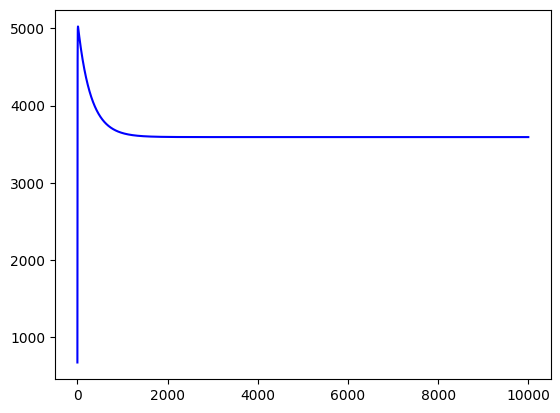

In [141]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),loss_history,color = 'blue')
plt.show()

In [142]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive
